# String Formatting

String formatting lets you inject items into a string rather than trying to chain items together using commas or string concatenation. As a quick comparison, consider:

    player = 'Thomas'
    points = 33
    
    'Last night, '+player+' scored '+str(points)+' points.'  # concatenation
    
    f'Last night, {player} scored {points} points.'          # string formatting


There are three ways to perform string formatting.
* The oldest method involves placeholders using the modulo `%` character. Tushar I am not studying this.
* An improved technique uses the `.format()` string method. tushar you will use this method
* The newest method, introduced with Python 3.6, uses formatted string literals, called *f-strings*.

Since you will likely encounter all three versions in someone else's code, we describe each of them here.

## Formatting with placeholders
You can use <code>%s</code> to inject strings into your print statements. The modulo `%` is referred to as a "string formatting operator".

In [1]:
print("I'm going to inject %s here." %'something')

I'm going to inject something here.


You can pass multiple items by placing them inside a tuple after the `%` operator.

In [2]:
print("I'm going to inject %s text here, and %s text here." %('some','more'))

I'm going to inject some text here, and more text here.


You can also pass variable names:

In [3]:
x, y = 'some', 'more'
print("I'm going to inject %s text here, and %s text here."%(x,y))

I'm going to inject some text here, and more text here.


### Format conversion methods.
It should be noted that two methods <code>%s</code> and <code>%r</code> convert any python object to a string using two separate methods: `str()` and `repr()`. We will learn more about these functions later on in the course, but you should note that `%r` and `repr()` deliver the *string representation* of the object, including quotation marks and any escape characters.

In [4]:
print('He said his name was %s.' %'Fred')
print('He said his name was %r.' %'Fred')

He said his name was Fred.
He said his name was 'Fred'.


As another example, `\t` inserts a tab into a string.

In [5]:
print('I once caught a fish %s.' %'this \tbig')
print('I once caught a fish %r.' %'this \tbig')

I once caught a fish this 	big.
I once caught a fish 'this \tbig'.


The `%s` operator converts whatever it sees into a string, including integers and floats. The `%d` operator converts numbers to integers first, without rounding. Note the difference below:

In [6]:
print('I wrote %s programs today.' %3.75)
print('I wrote %d programs today.' %3.75)   

I wrote 3.75 programs today.
I wrote 3 programs today.


### Padding and Precision of Floating Point Numbers
Floating point numbers use the format <code>%5.2f</code>. Here, <code>5</code> would be the minimum number of characters the string should contain; these may be padded with whitespace if the entire number does not have this many digits. Next to this, <code>.2f</code> stands for how many numbers to show past the decimal point. Let's see some examples:

In [7]:
print('Floating point numbers: %5.2f' %(13.144))

Floating point numbers: 13.14


In [8]:
print('Floating point numbers: %1.0f' %(13.144))

Floating point numbers: 13


In [9]:
print('Floating point numbers: %1.5f' %(13.144))

Floating point numbers: 13.14400


In [10]:
print('Floating point numbers: %10.2f' %(13.144))

Floating point numbers:      13.14


In [11]:
print('Floating point numbers: %25.2f' %(13.144))

Floating point numbers:                     13.14


For more information on string formatting with placeholders visit https://docs.python.org/3/library/stdtypes.html#old-string-formatting

### Multiple Formatting
Nothing prohibits using more than one conversion tool in the same print statement:

In [12]:
print('First: %s, Second: %5.2f, Third: %r' %('hi!',3.1415,'bye!'))

First: hi!, Second:  3.14, Third: 'bye!'


## Formatting with the `.format()` method
A better way to format objects into your strings for print statements is with the string `.format()` method. The syntax is:

    'String here {} then also {}'.format('something1','something2')
    
For example:

In [13]:
print('This is a string with an {}'.format('insert'))

This is a string with an insert


### The .format() method has several advantages over the %s placeholder method:

#### 1. Inserted objects can be called by index position:

In [14]:
print('The {2} {1} {0}'.format('fox','brown','quick'))

The quick brown fox


#### 2. Inserted objects can be assigned keywords:

In [15]:
print('First Object: {a}, Second Object: {b}, Third Object: {c}'.format(a=1,b='Two',c=12.3))

First Object: 1, Second Object: Two, Third Object: 12.3


#### 3. Inserted objects can be reused, avoiding duplication:

In [16]:
print('A %s saved is a %s earned.' %('penny','penny'))
# vs.
print('A {p} saved is a {p} earned.'.format(p='penny'))

A penny saved is a penny earned.
A penny saved is a penny earned.


### Alignment, padding and precision with `.format()`
Within the curly braces you can assign field lengths, left/right alignments, rounding parameters and more

In [17]:
print('{0:8} | {1:9}'.format('Fruit', 'Quantity'))
print('{0:8} | {1:9}'.format('Apples', 3.))
print('{0:8} | {1:9}'.format('Oranges', 10))

Fruit    | Quantity 
Apples   |       3.0
Oranges  |        10


By default, `.format()` aligns text to the left, numbers to the right. You can pass an optional `<`,`^`, or `>` to set a left, center or right alignment:

In [18]:
print('{0:<8} | {1:^8} | {2:>8}'.format('Left','Center','Right'))
print('{0:<8} | {1:^8} | {2:>8}'.format(11,22,33))

Left     |  Center  |    Right
11       |    22    |       33


You can precede the aligment operator with a padding character

In [19]:
print('{0:=<8} | {1:-^8} | {2:.>8}'.format('Left','Center','Right'))
print('{0:=<8} | {1:-^8} | {2:.>8}'.format(11,22,33))

Left==== | -Center- | ...Right
11====== | ---22--- | ......33


Field widths and float precision are handled in a way similar to placeholders. The following two print statements are equivalent:

In [20]:
print('This is my ten-character, two-decimal number:%10.2f' %13.579)
print('This is my ten-character, two-decimal number:{0:10.2f}'.format(13.579))

This is my ten-character, two-decimal number:     13.58
This is my ten-character, two-decimal number:     13.58


Note that there are 5 spaces following the colon, and 5 characters taken up by 13.58, for a total of ten characters.

For more information on the string `.format()` method visit https://docs.python.org/3/library/string.html#formatstrings

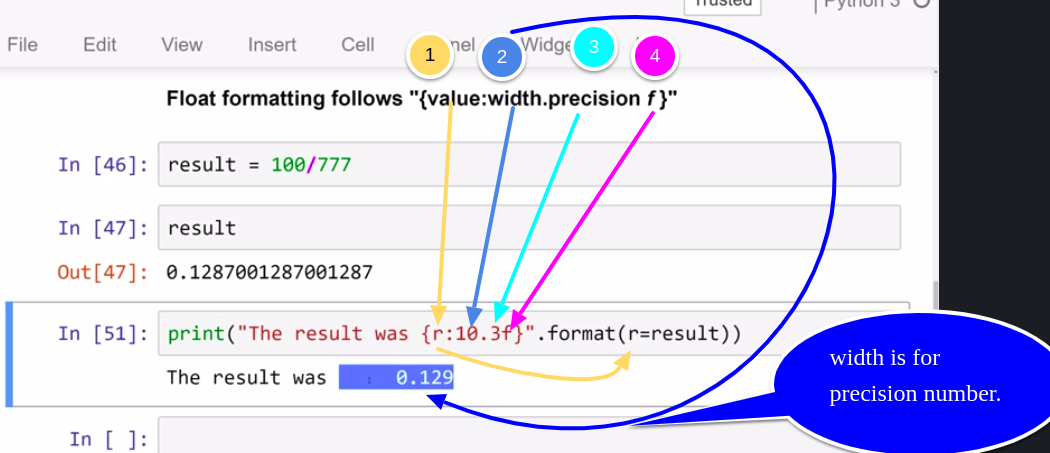

## Formatted String Literals (f-strings)

Introduced in Python 3.6, f-strings offer several benefits over the older `.format()` string method described above. For one, you can bring outside variables immediately into to the string rather than pass them as arguments through `.format(var)`.

In [21]:
name = 'Fred'

print(f"He said his name is {name}.") #here we have used f which is f-string and the best method to use.
#Better than format method.

He said his name is Fred.


Pass `!r` to get the string representation:

In [22]:
print(f"He said his name is {name!r}")

He said his name is 'Fred'


#### Float formatting follows `"result: {value:{width}.{precision}}"`

Where with the `.format()` method you might see `{value:10.4f}`, with f-strings this can become `{value:{10}.{6}}`


In [23]:
num = 23.45678
print("My 10 character, four decimal number is:{0:10.4f}".format(num))
print(f"My 10 character, four decimal number is:{num:{10}.{6}}")

My 10 character, four decimal number is:   23.4568
My 10 character, four decimal number is:   23.4568


Note that with f-strings, *precision* refers to the total number of digits, not just those following the decimal. This fits more closely with scientific notation and statistical analysis. Unfortunately, f-strings do not pad to the right of the decimal, even if precision allows it:

In [24]:
num = 23.45
print("My 10 character, four decimal number is:{0:10.4f}".format(num))
print(f"My 10 character, four decimal number is:{num:{10}.{6}}")

My 10 character, four decimal number is:   23.4500
My 10 character, four decimal number is:     23.45


If this becomes important, you can always use `.format()` method syntax inside an f-string:

In [25]:
num = 23.45
print("My 10 character, four decimal number is:{0:10.4f}".format(num))
print(f"My 10 character, four decimal number is:{num:10.4f}")

My 10 character, four decimal number is:   23.4500
My 10 character, four decimal number is:   23.4500


For more info on formatted string literals visit https://docs.python.org/3/reference/lexical_analysis.html#f-strings

That is the basics of string formatting!